#FRAUD DATA
#Use Random Forest to prepare a model on fraud data
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (2).csv


In [3]:
data=pd.read_csv('Fraud_check (1).csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
le=LabelEncoder()
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital.Status']=le.fit_transform(data['Marital.Status'])
data['Urban']=le.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [11]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [12]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


In [13]:
data['Taxable.Income']=np.where(data['Taxable.Income']<=30000,0,1)
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


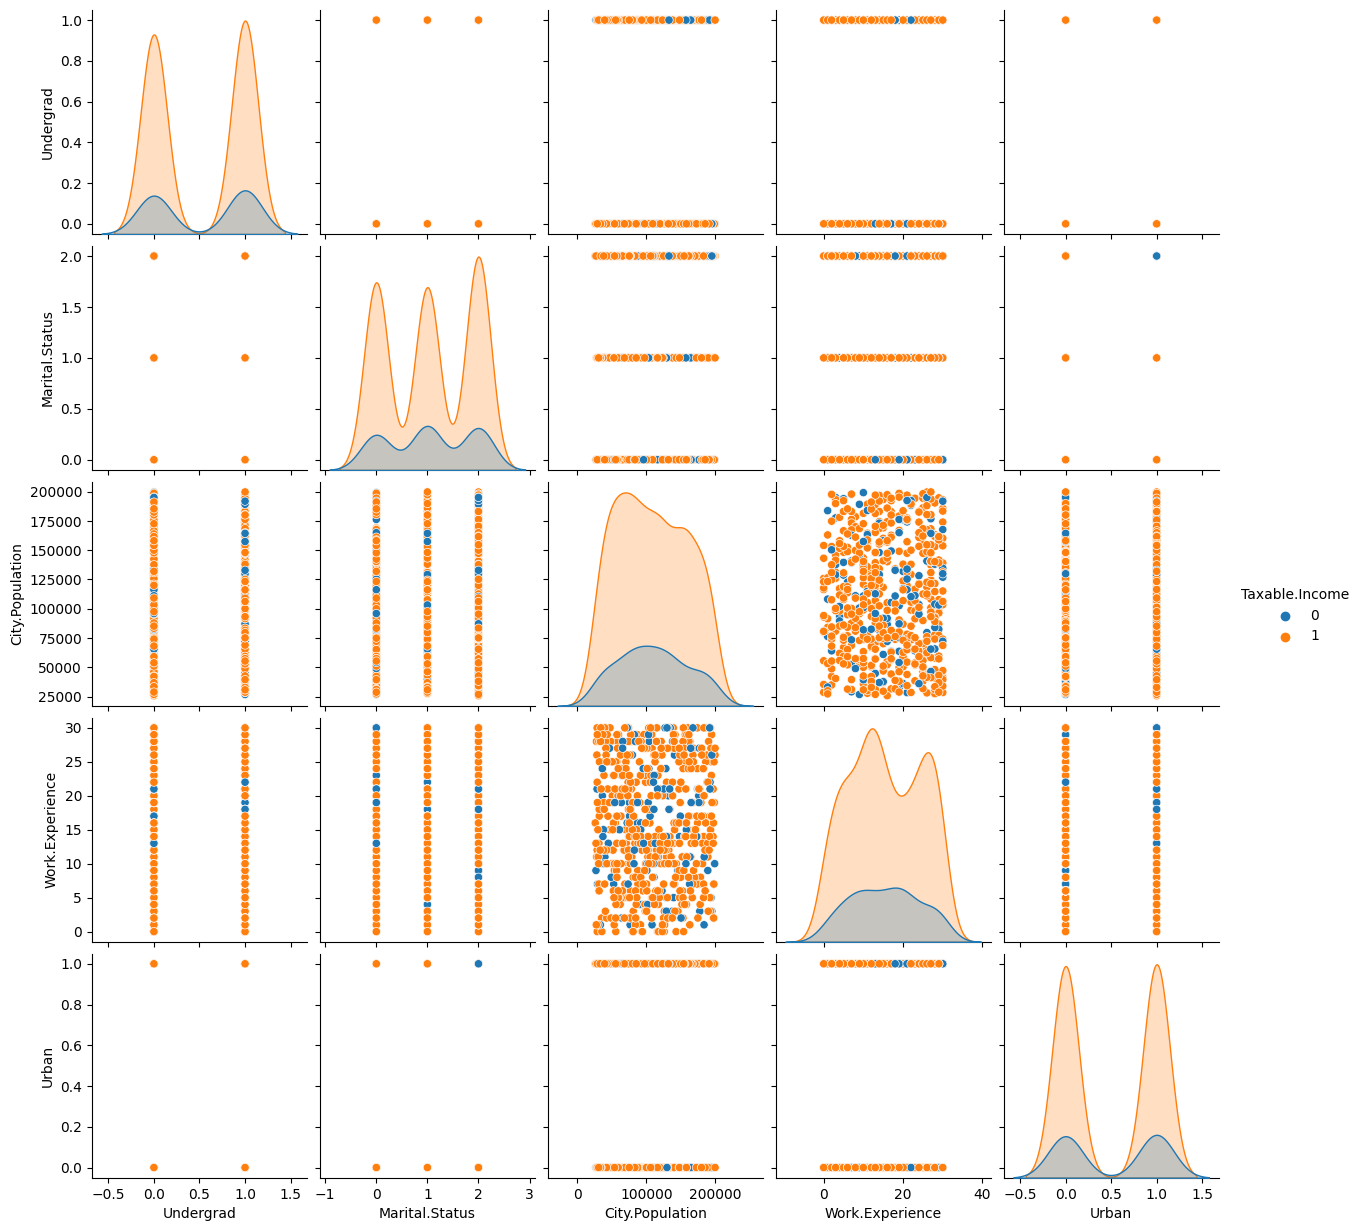

In [14]:
sns.pairplot(data, hue='Taxable.Income')

<ipython-input-15-eee4c025c4b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


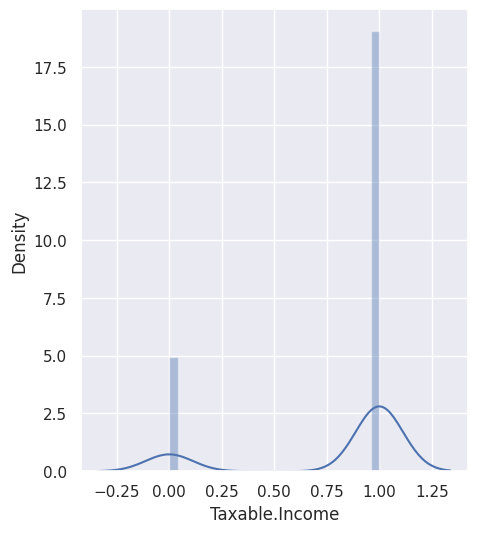

<ipython-input-15-eee4c025c4b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


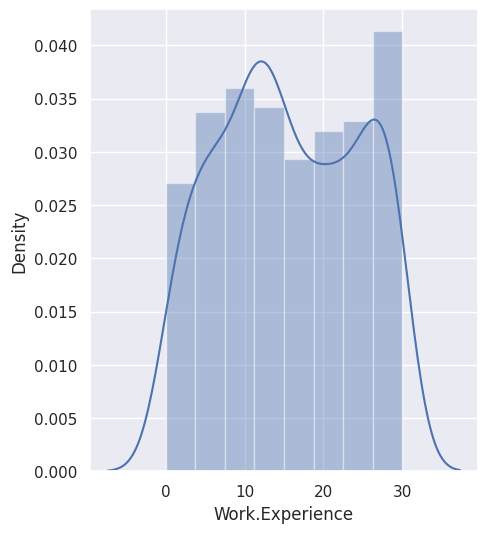

<ipython-input-15-eee4c025c4b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


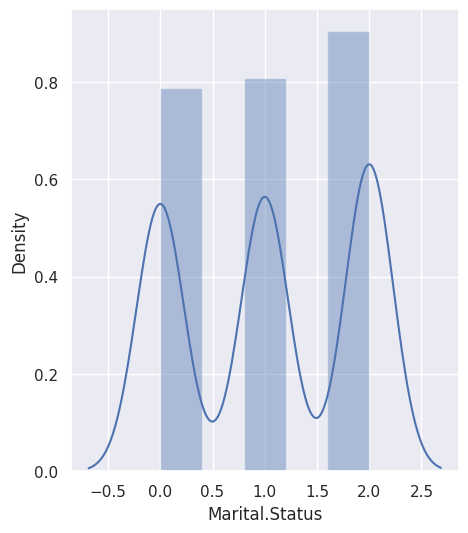

<ipython-input-15-eee4c025c4b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data[i]))


Axes(0.125,0.11;0.775x0.77)


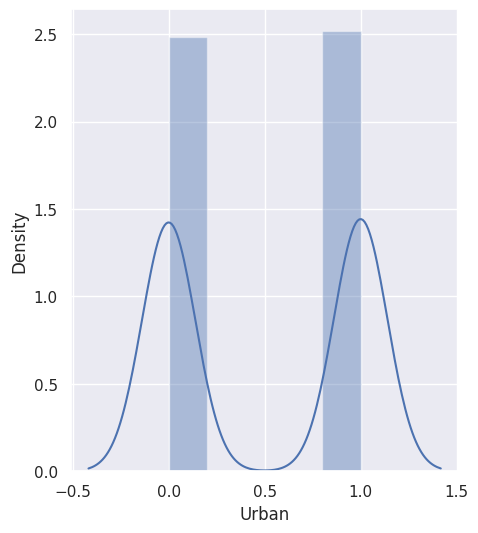

In [15]:
columns=['Taxable.Income','Work.Experience','Marital.Status','Urban']
sns.set(rc={'figure.figsize':(5,6)})
for i in columns:
  plt.show()
  print(sns.distplot(data[i]))

<Axes: >

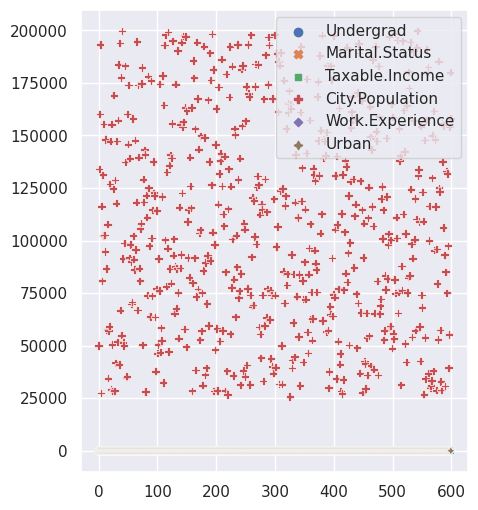

In [16]:
sns.scatterplot(data)

<Axes: >

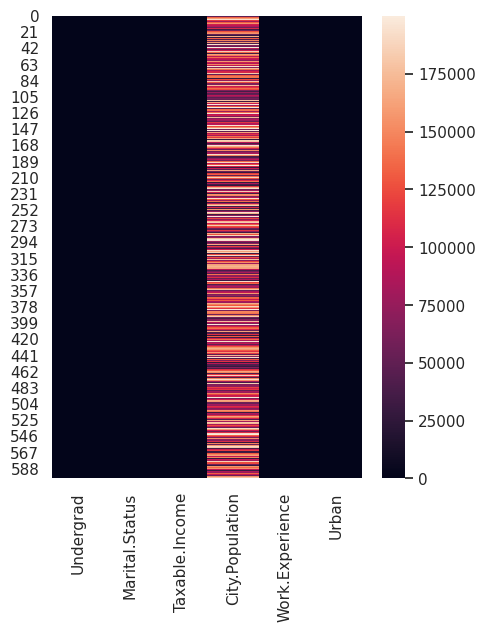

In [17]:
sns.heatmap(data)

In [18]:
x=data.drop('Taxable.Income',axis=1)
y=data['Taxable.Income']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [20]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
26,1,0,169128,15,0
233,0,1,63701,19,1
372,1,1,168473,9,0
13,0,1,86649,16,1
530,1,0,194421,17,1
...,...,...,...,...,...
52,0,2,91828,23,0
71,0,2,105680,22,0
555,0,2,53848,10,0
470,1,1,148686,26,0


In [21]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
578,0,0,185339,6,0
253,1,2,77256,29,0
443,1,2,189209,9,0
538,0,1,119976,12,0
273,1,0,58942,20,0
...,...,...,...,...,...
454,0,1,29602,15,1
596,1,0,55369,2,1
206,1,2,52227,16,1
479,1,1,68995,21,0


In [22]:
y_train

26     1
233    0
372    1
13     1
530    1
      ..
52     1
71     1
555    1
470    1
298    1
Name: Taxable.Income, Length: 420, dtype: int64

In [23]:
y_test

578    1
253    1
443    0
538    1
273    1
      ..
454    1
596    1
206    1
479    1
361    1
Name: Taxable.Income, Length: 180, dtype: int64

In [24]:
x_train.shape

(420, 5)

In [25]:
x_test.shape

(180, 5)

In [26]:
y_train.shape

(420,)

In [27]:
y_test.shape

(180,)

In [28]:
model =RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [29]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [30]:
df=pd.DataFrame({'actual':y_test,'predict':y_pred})
df

,actual,predict
578,1,1
253,1,1
443,0,1
538,1,1
273,1,1
...,...,...
454,1,1
596,1,1
206,1,1
479,1,1


In [31]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7666666666666667

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.13      0.16        30
           1       0.84      0.89      0.86       150

    accuracy                           0.77       180
   macro avg       0.52      0.51      0.51       180
weighted avg       0.73      0.77      0.75       180



#BAGGING CLASSIFIER

In [33]:
classifier =DecisionTreeClassifier()
model=BaggingClassifier(classifier,n_estimators=100)

In [34]:
model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [35]:
y_pred_bc=model.predict(x_test)
y_pred_bc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [36]:
df_bc=pd.DataFrame({'actual':y_test,'predict':y_pred_bc})
df_bc

,actual,predict
578,1,1
253,1,1
443,0,1
538,1,1
273,1,1
...,...,...
454,1,1
596,1,1
206,1,1
479,1,1


In [37]:
accuracy= accuracy_score(y_test,y_pred_bc)
accuracy

0.7444444444444445

In [38]:
print(classification_report(y_test,y_pred_bc))

              precision    recall  f1-score   support

           0       0.10      0.07      0.08        30
           1       0.82      0.88      0.85       150

    accuracy                           0.74       180
   macro avg       0.46      0.47      0.47       180
weighted avg       0.70      0.74      0.72       180

